In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from numpy import random
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Train and Test split of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [571]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)
#print(X.shape)

# Implementing SGD on LINEAR REGRESSION

In [19]:
# IMPLEMENTING STOCHASTIC GRADIENT DESCENT ALGORITHM

def SGD(X,y,n_iter,r=0.01,k=10):
    w_new = np.random.normal(0,1,X.shape[1])
    b_new = np.random.normal(0,1)
    iteration = 1
    m = X.shape[0]
    while(iteration<=n_iter):
        w_old = w_new
        b_old = b_new
        w_temp = np.zeros(X.shape[1])
        b_temp = 0
        random_ids = random.choice(m,m,replace=False)
        X_shuffled = X[random_ids,:]
        y_shuffled = y[random_ids]
        for i in range(k):
            w_temp += X_shuffled[i] * (y_shuffled[i] - (np.dot(X_shuffled[i],w_old) + b_old))
            b_temp += (y_shuffled[i] - (np.dot(X_shuffled[i],w_old) + b_old))
            
        w_temp = w_temp*(-2/k)
        b_temp = b_temp*(-2/k)       
        w_new = w_old - r*w_temp
        b_new = b_old - r*b_temp
                
        if(w_old == w_new).all():
            break
        #r = r/2
        iteration = iteration+1
    
    return w_new,b_new
        
    

In [20]:
iterations = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
MSE = []
predictions = np.zeros(X_test.shape[0])
for i in range(0,20):
    w,b = SGD(X_train,y_train,n_iter = iterations[i])
    for j in range(0,X_test.shape[0]):
        predictions[j] = np.dot(w,X_test[j])+b
    print('Iterations : ',iterations[i],' MSE : ',mean_squared_error(y_test,predictions))
    MSE.append(mean_squared_error(y_test, predictions))    
    

Iterations :  50  MSE :  100.34019645774639
Iterations :  100  MSE :  40.49070490913116
Iterations :  150  MSE :  30.96207278505235
Iterations :  200  MSE :  25.91001432269464
Iterations :  250  MSE :  26.94841143110896
Iterations :  300  MSE :  25.13003719291984
Iterations :  350  MSE :  25.547366217531604
Iterations :  400  MSE :  26.680307221342442
Iterations :  450  MSE :  26.39429679785423
Iterations :  500  MSE :  24.722723974402385
Iterations :  550  MSE :  25.153033476114928
Iterations :  600  MSE :  24.710052056778814
Iterations :  650  MSE :  25.809674938644623
Iterations :  700  MSE :  25.286909531556756
Iterations :  750  MSE :  25.031769608638292
Iterations :  800  MSE :  25.61971117188206
Iterations :  850  MSE :  25.090794763845125
Iterations :  900  MSE :  27.114364180568902
Iterations :  950  MSE :  25.71815247117574
Iterations :  1000  MSE :  26.130545219256273


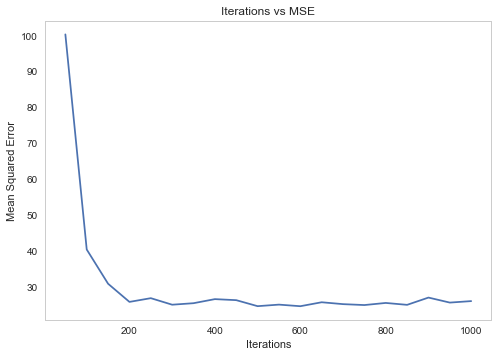

In [21]:
# Plot MSE vs Iterations
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#plt.grid(b=None)
sns.set_style("whitegrid",{'axes.grid' : False})
plt.plot(iterations, MSE)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Iterations vs MSE")
plt.show()

In [22]:
iteration = iterations[MSE.index(min(MSE))]
print(iteration)

600


In [23]:
w,b = SGD(X_train,y_train,n_iter=iteration)

In [24]:
# Now predicting the house prices on X_train data
manual_sgd_predictions_train = np.zeros(X_train.shape[0])
for i in range(0,X_train.shape[0]):
    manual_sgd_predictions_train[i] = np.dot(w,X_train[i])+b


In [25]:
# Now predicting the house prices on X_test data
manual_sgd_predictions_test = np.zeros(X_test.shape[0])
for i in range(0,X_test.shape[0]):
    manual_sgd_predictions_test[i] = np.dot(w,X_test[i])+b


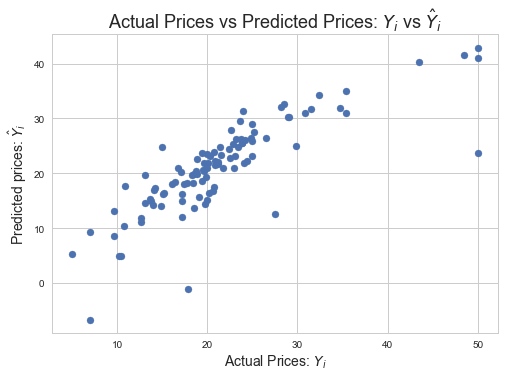

In [26]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
#%matplotlib inline
plt.grid(b=None)
plt.scatter(y_test, manual_sgd_predictions_test)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

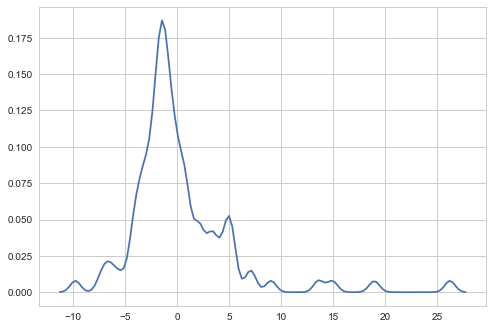

In [27]:
delta_y = y_test - manual_sgd_predictions_test;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

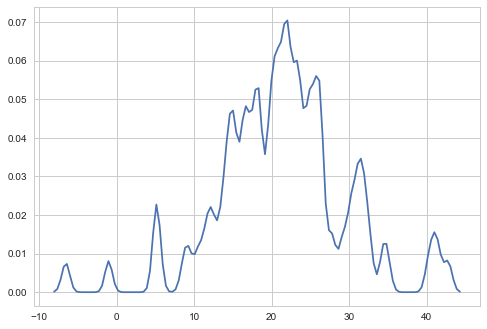

In [28]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions_test), bw=0.5)
plt.show()

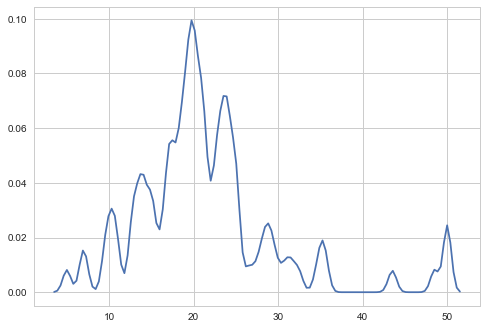

In [29]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=0.5)
plt.show()

In [30]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
MSE_Manual_SGD_Train = mean_squared_error(y_train,manual_sgd_predictions_train)
MSE_Manual_SGD_Test = mean_squared_error(y_test,manual_sgd_predictions_test)
MAE_Manual_SGD_Train = mean_absolute_error(y_train,manual_sgd_predictions_train)
MAE_Manual_SGD_Test = mean_absolute_error(y_test,manual_sgd_predictions_test)
RMSE_Manual_SGD_Train = np.sqrt(mean_squared_error(y_train,manual_sgd_predictions_train))
RMSE_Manual_SGD_Test = np.sqrt(mean_squared_error(y_test,manual_sgd_predictions_test))

print("Mean Absolute Error for Implementation of SGD from Scratch is : ",mean_absolute_error(y_test, manual_sgd_predictions_test))
print("Mean Squared Error for Implementation of SGD from Scratch is : ",mean_squared_error(y_test, manual_sgd_predictions_test))
print("Root Mean Squared Error for Implementation of SGD from Scratch is : ",np.sqrt(mean_squared_error(y_test,manual_sgd_predictions_test)))

Mean Absolute Error for Implementation of SGD from Scratch is :  3.207541960228099
Mean Squared Error for Implementation of SGD from Scratch is :  24.70657162438156
Root Mean Squared Error for Implementation of SGD from Scratch is :  4.970570553204285


# Implementing sklearn's SGD

In [40]:
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [41]:
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001)
sgd.fit(X_train,y_train)
sklearn_sgd_predictions_train = sgd.predict(X_train)
sklearn_sgd_predictions_test = sgd.predict(X_test)
w_sgd = sgd.coef_

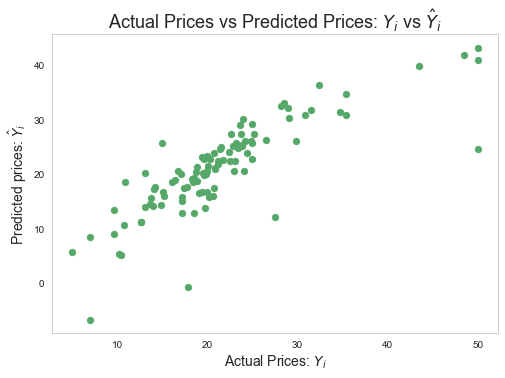

In [42]:
plt.grid(b=None)
plt.scatter(y_test, sklearn_sgd_predictions_test)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

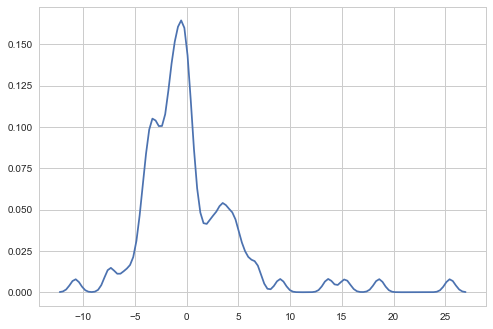

In [43]:
delta_y = y_test - sklearn_sgd_predictions_test;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

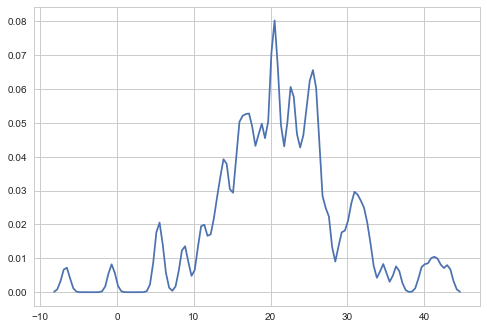

In [44]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions_test), bw=0.5)
plt.show()

In [45]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
MSE_sklearn_Test = mean_squared_error(y_test, sklearn_sgd_predictions_test)
MSE_sklearn_Train = mean_squared_error(y_train,sklearn_sgd_predictions_train)
MAE_sklearn_Train = mean_absolute_error(y_train,sklearn_sgd_predictions_train)
MAE_sklearn_Test = mean_absolute_error(y_test,sklearn_sgd_predictions_test)
RMSE_sklearn_Train = np.sqrt(mean_squared_error(y_train,sklearn_sgd_predictions_train))
RMSE_sklearn_Test = np.sqrt(mean_squared_error(y_test,sklearn_sgd_predictions_test))
print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(y_test,sklearn_sgd_predictions_test))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(y_test, sklearn_sgd_predictions_test))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(y_test,sklearn_sgd_predictions_test)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.191095896866129
Mean Squared Error for Implementation of SGD using SKLEARN is :  24.59154872819201
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  4.958986663441636


# Comparing Weights

In [46]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",w)
ptable.add_column("Weights of Sklearn's SGD",w_sgd)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |  -0.9486173366013014  |   -0.9854261444408638    |
|   2   |   0.6337727328857912  |    0.7275637867580182    |
|   3   |  0.053059301077179995 |   0.24472416150714904    |
|   4   |  0.22586512840095874  |    0.7439188694574566    |
|   5   |  -1.5754314356959793  |   -2.0166159096032046    |
|   6   |   2.944078356124292   |    3.151684800102143     |
|   7   |  -0.0787592487110848  |   -0.20407489194700984   |
|   8   |   -2.653545926495107  |    -3.020152998817232    |
|   9   |   1.4994651684282034  |     2.2782164652466      |
|   10  |  -1.4995928519767847  |    -1.82387572749531     |
|   11  |   -2.163579234271619  |    -2.009309865720529    |
|   12  |   1.0680725753550613  |    1.1429494536678835    |
|   13  |  -3.7708777894939893  |   -3.6809583827970225    |
+-------+---------------

# Plot the predictions Manual vs sklearn

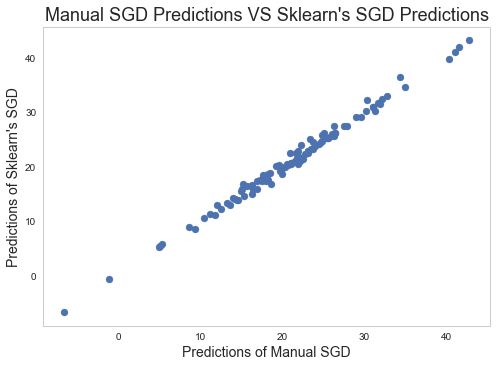

In [47]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.grid(b=None)
plt.scatter(manual_sgd_predictions_test, sklearn_sgd_predictions_test)
plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions",size=18)
plt.show()

# Comparing Errors

In [49]:
table_manual_sgd = PrettyTable()
table_manual_sgd.field_names = ["Data","Error","Result"]
table_manual_sgd.add_row(["Train","MSE",round(MSE_Manual_SGD_Train,2)])
table_manual_sgd.add_row(["Train","MAE",round(MAE_Manual_SGD_Train,2)])
table_manual_sgd.add_row(["Train","RMSE",round(RMSE_Manual_SGD_Train,2)])
table_manual_sgd.add_row(["Test","MSE",round(MSE_Manual_SGD_Test,2)])
table_manual_sgd.add_row(["Test","MAE",round(MAE_Manual_SGD_Test,2)])
table_manual_sgd.add_row(["Test","RMSE",round(RMSE_Manual_SGD_Test,2)])
print(table_manual_sgd.get_string(title="Manual SGD"))

table_sklearn_sgd = PrettyTable()
table_sklearn_sgd.field_names = ["Data","Error","Result"]
table_sklearn_sgd.add_row(["Train","MSE",round(MSE_sklearn_Train,2)])
table_sklearn_sgd.add_row(["Train","MAE",round(MAE_sklearn_Train,2)])
table_sklearn_sgd.add_row(["Train","RMSE",round(RMSE_sklearn_Train,2)])
table_sklearn_sgd.add_row(["Test","MSE",round(MSE_sklearn_Test,2)])
table_sklearn_sgd.add_row(["Test","MAE",round(MAE_sklearn_Test,2)])
table_sklearn_sgd.add_row(["Test","RMSE",round(RMSE_sklearn_Test,2)])
print(table_sklearn_sgd.get_string(title="Sklearn SGD"))

+------------------------+
|       Manual SGD       |
+-------+-------+--------+
|  Data | Error | Result |
+-------+-------+--------+
| Train |  MSE  | 22.42  |
| Train |  MAE  |  3.35  |
| Train |  RMSE |  4.73  |
|  Test |  MSE  | 24.71  |
|  Test |  MAE  |  3.21  |
|  Test |  RMSE |  4.97  |
+-------+-------+--------+
+------------------------+
|      Sklearn SGD       |
+-------+-------+--------+
|  Data | Error | Result |
+-------+-------+--------+
| Train |  MSE  |  21.7  |
| Train |  MAE  |  3.33  |
| Train |  RMSE |  4.66  |
|  Test |  MSE  | 24.59  |
|  Test |  MAE  |  3.19  |
|  Test |  RMSE |  4.96  |
+-------+-------+--------+


# Conclusion

By observing the above results sklearn's SGD and manual SGD is producing similar kind of results for MAE,MSE and RMSE.